In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
df.shape

(418, 12)

<Axes: >

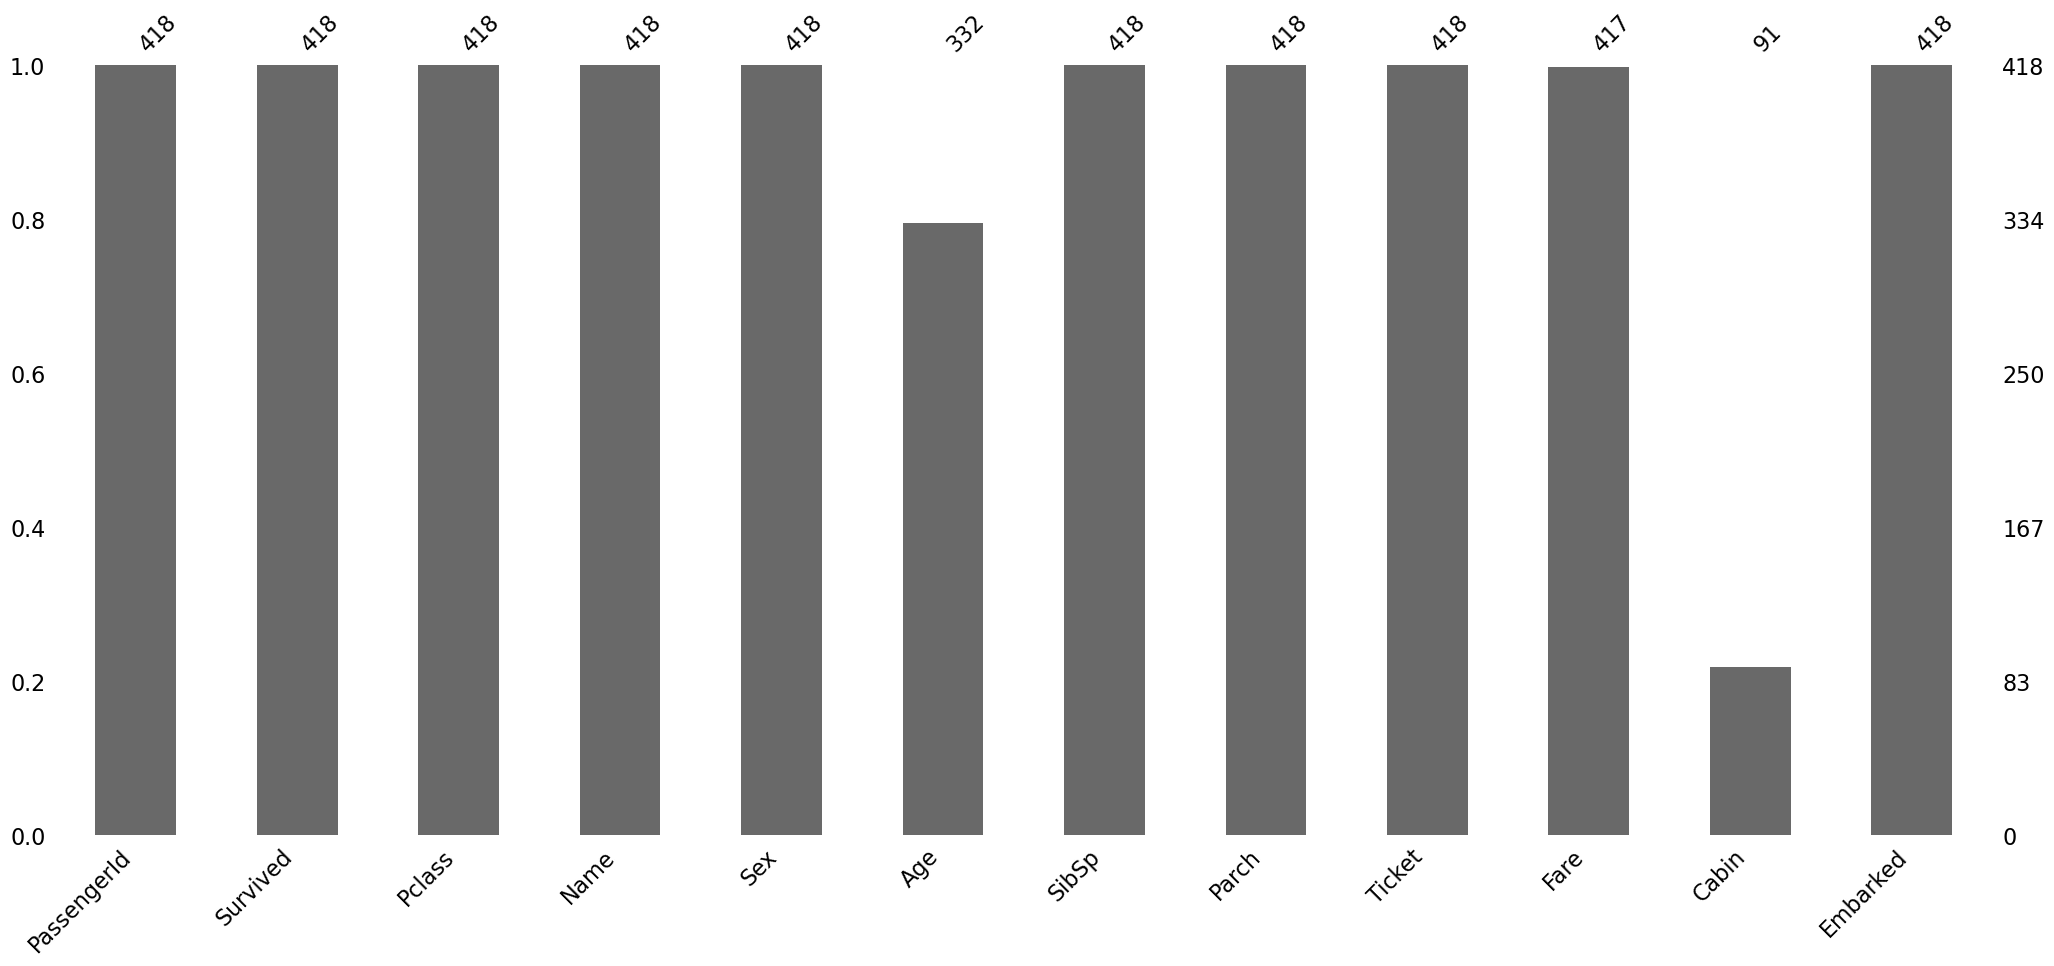

In [70]:
import missingno
missingno.bar(df)

In [71]:
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].strip().split(" ")[0])

common_titles = ["Mr.", "Miss.", "Mrs."]
df["Title"] = [0 if x in common_titles else 1 for x in df["Title"]]
df["Cabin"] = [0 if str(x) == "nan" else 1 for x in df["Cabin"]]

In [72]:
embarked = pd.get_dummies(df["Embarked"])

In [73]:
df = pd.concat([df, embarked], axis=1)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,C,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,0,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,0,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,0,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,0,0,1


In [75]:
mean_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()
mean_dr = df[df["Name"].str.contains('Dr.', na=False)]['Age'].mean().round()

print("Mr: ", mean_mr)
print("Miss: ", mean_miss)
print("Mrs: ", mean_mrs)
print("Master: ", mean_master)
print("Dr: ", mean_dr)

Mr:  34.0
Miss:  22.0
Mrs:  39.0
Master:  7.0
Dr:  34.0


In [76]:
ages = {
    "Mr.": 34.0,
    "Miss.": 22.0,
    "Mrs.": 39.0,
    "Master.": 7.0,
    "Dr.": 34.0
}

In [77]:
def age(text):
    name = text[0]
    age = text[1]
    
    if pd.isnull(age):
        for k, v in ages.items():
            if k in name:
                return v
            
    else:
        return age

In [78]:
df['Age'] = df[['Name', 'Age']].apply(age, axis=1)

In [79]:
df.drop(["Name", "Embarked"], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,C,Q,S
0,892,0,3,male,34.5,0,0,330911,7.8292,0,0,0,1,0
1,893,1,3,female,47.0,1,0,363272,7.0000,0,0,0,0,1
2,894,0,2,male,62.0,0,0,240276,9.6875,0,0,0,1,0
3,895,0,3,male,27.0,0,0,315154,8.6625,0,0,0,0,1
4,896,1,3,female,22.0,1,1,3101298,12.2875,0,0,0,0,1


In [80]:
df = df.dropna(how="any")

<Axes: >

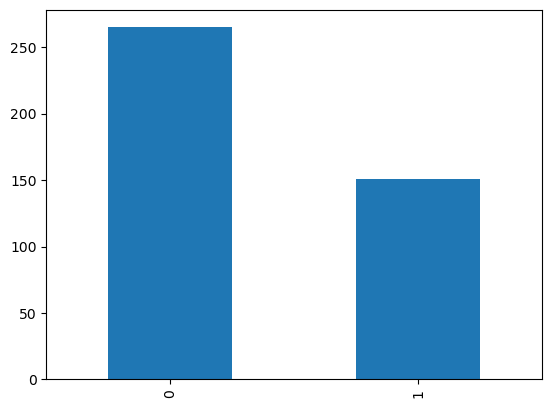

In [81]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: >

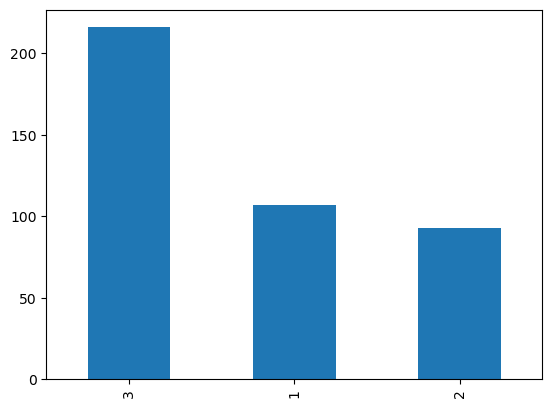

In [82]:
df["Pclass"].value_counts().plot(kind="bar")

<Axes: ylabel='Sex'>

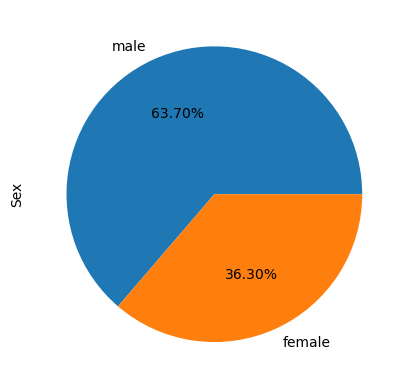

In [83]:
df["Sex"].value_counts().plot(kind="pie", autopct="%.2f%%")

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Title'}>],
       [<Axes: title={'center': 'C'}>, <Axes: title={'center': 'Q'}>,
        <Axes: title={'center': 'S'}>]], dtype=object)

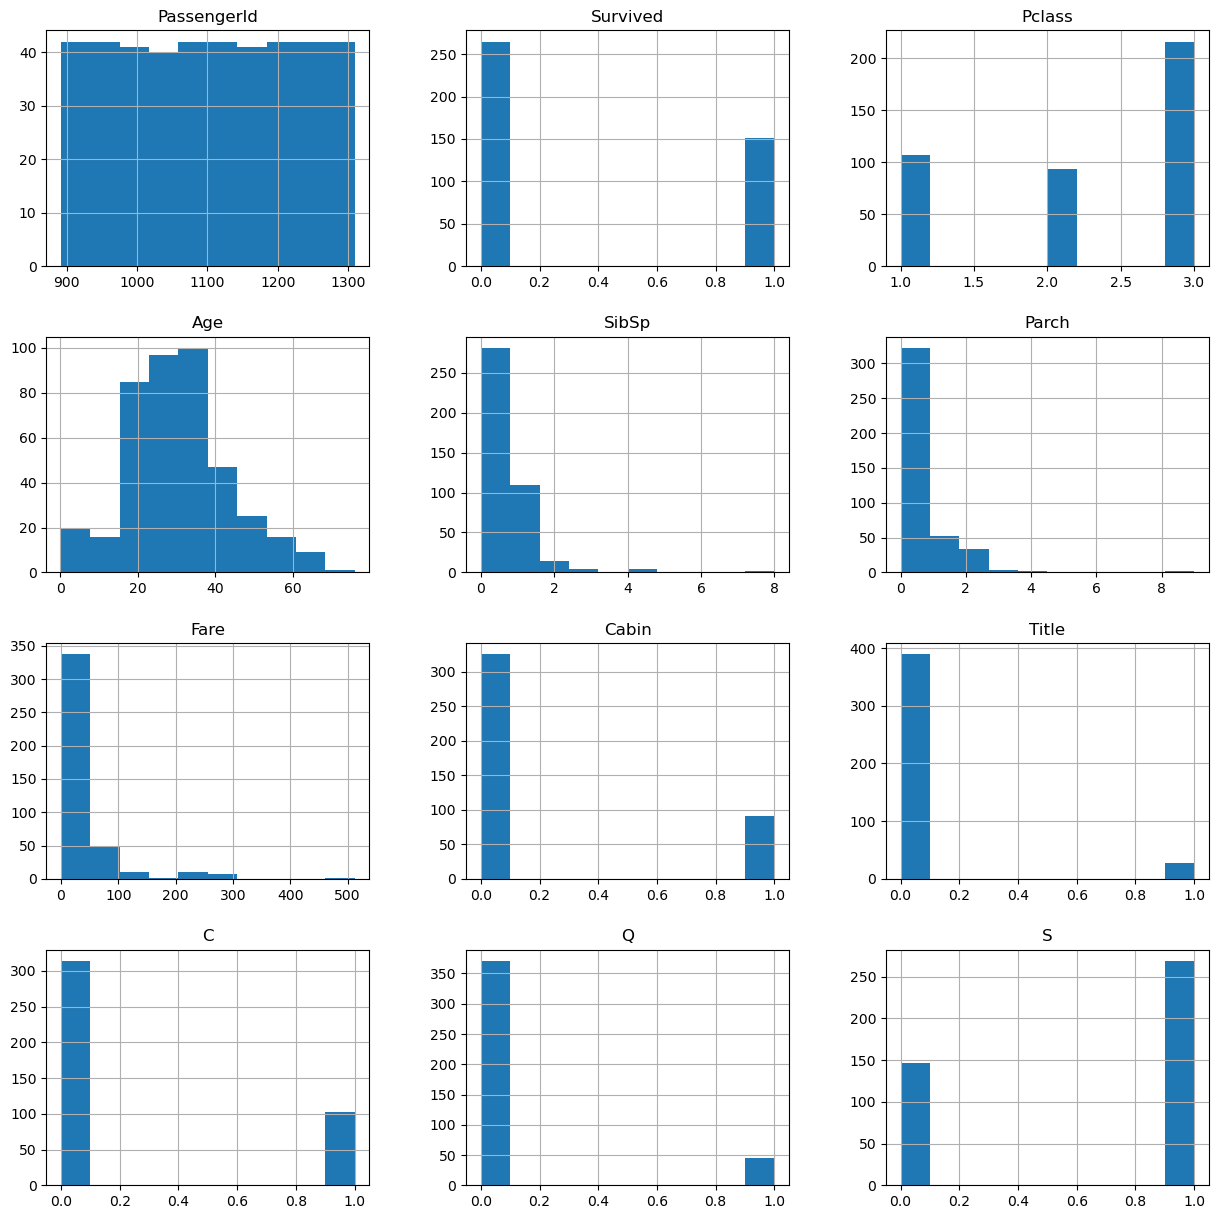

In [84]:
df.hist(figsize=(15, 15))

In [85]:
df["Sex"] = df["Sex"].map({
    "male": 0, "female": 1
})

In [86]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,C,Q,S
0,892,0,3,0,34.5,0,0,330911,7.8292,0,0,0,1,0
1,893,1,3,1,47.0,1,0,363272,7.0000,0,0,0,0,1
2,894,0,2,0,62.0,0,0,240276,9.6875,0,0,0,1,0
3,895,0,3,0,27.0,0,0,315154,8.6625,0,0,0,0,1
4,896,1,3,1,22.0,1,1,3101298,12.2875,0,0,0,0,1
